In [8]:
import tensorflow as tf

In [40]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
rng = numpy.random


In [41]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [42]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [43]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [44]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


In [45]:
pred = tf.add(tf.multiply(X, W), b)

In [46]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [35]:
init = tf.initialize_all_variables()

In [47]:
init = tf.global_variables_initializer()


Epoch: 0050 cost= 0.329749823 W= 0.530592 b= -1.22001
Epoch: 0100 cost= 0.300555050 W= 0.513879 b= -1.09979
Epoch: 0150 cost= 0.274730951 W= 0.498161 b= -0.986711
Epoch: 0200 cost= 0.251888633 W= 0.483378 b= -0.88036
Epoch: 0250 cost= 0.231683791 W= 0.469473 b= -0.780333
Epoch: 0300 cost= 0.213812009 W= 0.456396 b= -0.686257
Epoch: 0350 cost= 0.198003769 W= 0.444096 b= -0.597774
Epoch: 0400 cost= 0.184021249 W= 0.432529 b= -0.514555
Epoch: 0450 cost= 0.171653330 W= 0.421649 b= -0.436285
Epoch: 0500 cost= 0.160713807 W= 0.411416 b= -0.36267
Epoch: 0550 cost= 0.151037544 W= 0.401791 b= -0.293433
Epoch: 0600 cost= 0.142478988 W= 0.392739 b= -0.228314
Epoch: 0650 cost= 0.134908900 W= 0.384226 b= -0.167068
Epoch: 0700 cost= 0.128213212 W= 0.376219 b= -0.109465
Epoch: 0750 cost= 0.122290932 W= 0.368688 b= -0.0552877
Epoch: 0800 cost= 0.117052786 W= 0.361605 b= -0.00433246
Epoch: 0850 cost= 0.112419792 W= 0.354943 b= 0.0435922
Epoch: 0900 cost= 0.108322076 W= 0.348677 b= 0.0886665
Epoch: 0950

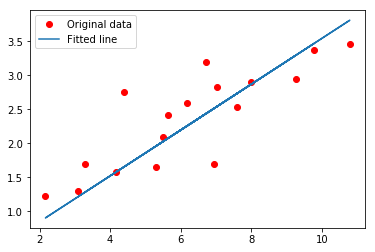

In [48]:
with tf.Session() as sess:
                sess.run(init)

   
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()